<a href="https://colab.research.google.com/github/MeenuVis/Machine-Learning/blob/main/AssignmentML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Data_Processed.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2393 entries, 0 to 2392
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                2393 non-null   int64
 1   DailyRate                          2393 non-null   int64
 2   DistanceFromHome                   2393 non-null   int64
 3   Education                          2393 non-null   int64
 4   EnvironmentSatisfaction            2393 non-null   int64
 5   HourlyRate                         2393 non-null   int64
 6   JobInvolvement                     2393 non-null   int64
 7   JobLevel                           2393 non-null   int64
 8   JobSatisfaction                    2393 non-null   int64
 9   MonthlyIncome                      2393 non-null   int64
 10  MonthlyRate                        2393 non-null   int64
 11  NumCompaniesWorked                 2393 non-null   int64
 12  PercentSalaryHike   

In [4]:
df.shape

(2393, 52)

In [5]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [6]:
print(df.Attrition == 1)

0        True
1       False
2        True
3       False
4       False
        ...  
2388     True
2389     True
2390     True
2391     True
2392     True
Name: Attrition, Length: 2393, dtype: bool


In [7]:
df.isnull().values.any() # missing value identification

False

In [8]:
df.isnull().values.sum()

0

In [9]:
df.head(5)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,1,0,0,0,1,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,1,0,0,0,1,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,0,0,0,1,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,1,0,0,0,1,0,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,0,0,1,0,1,0,0


In [10]:
df.shape

(2393, 52)

Text(0.5, 1.0, 'correlation matrix')

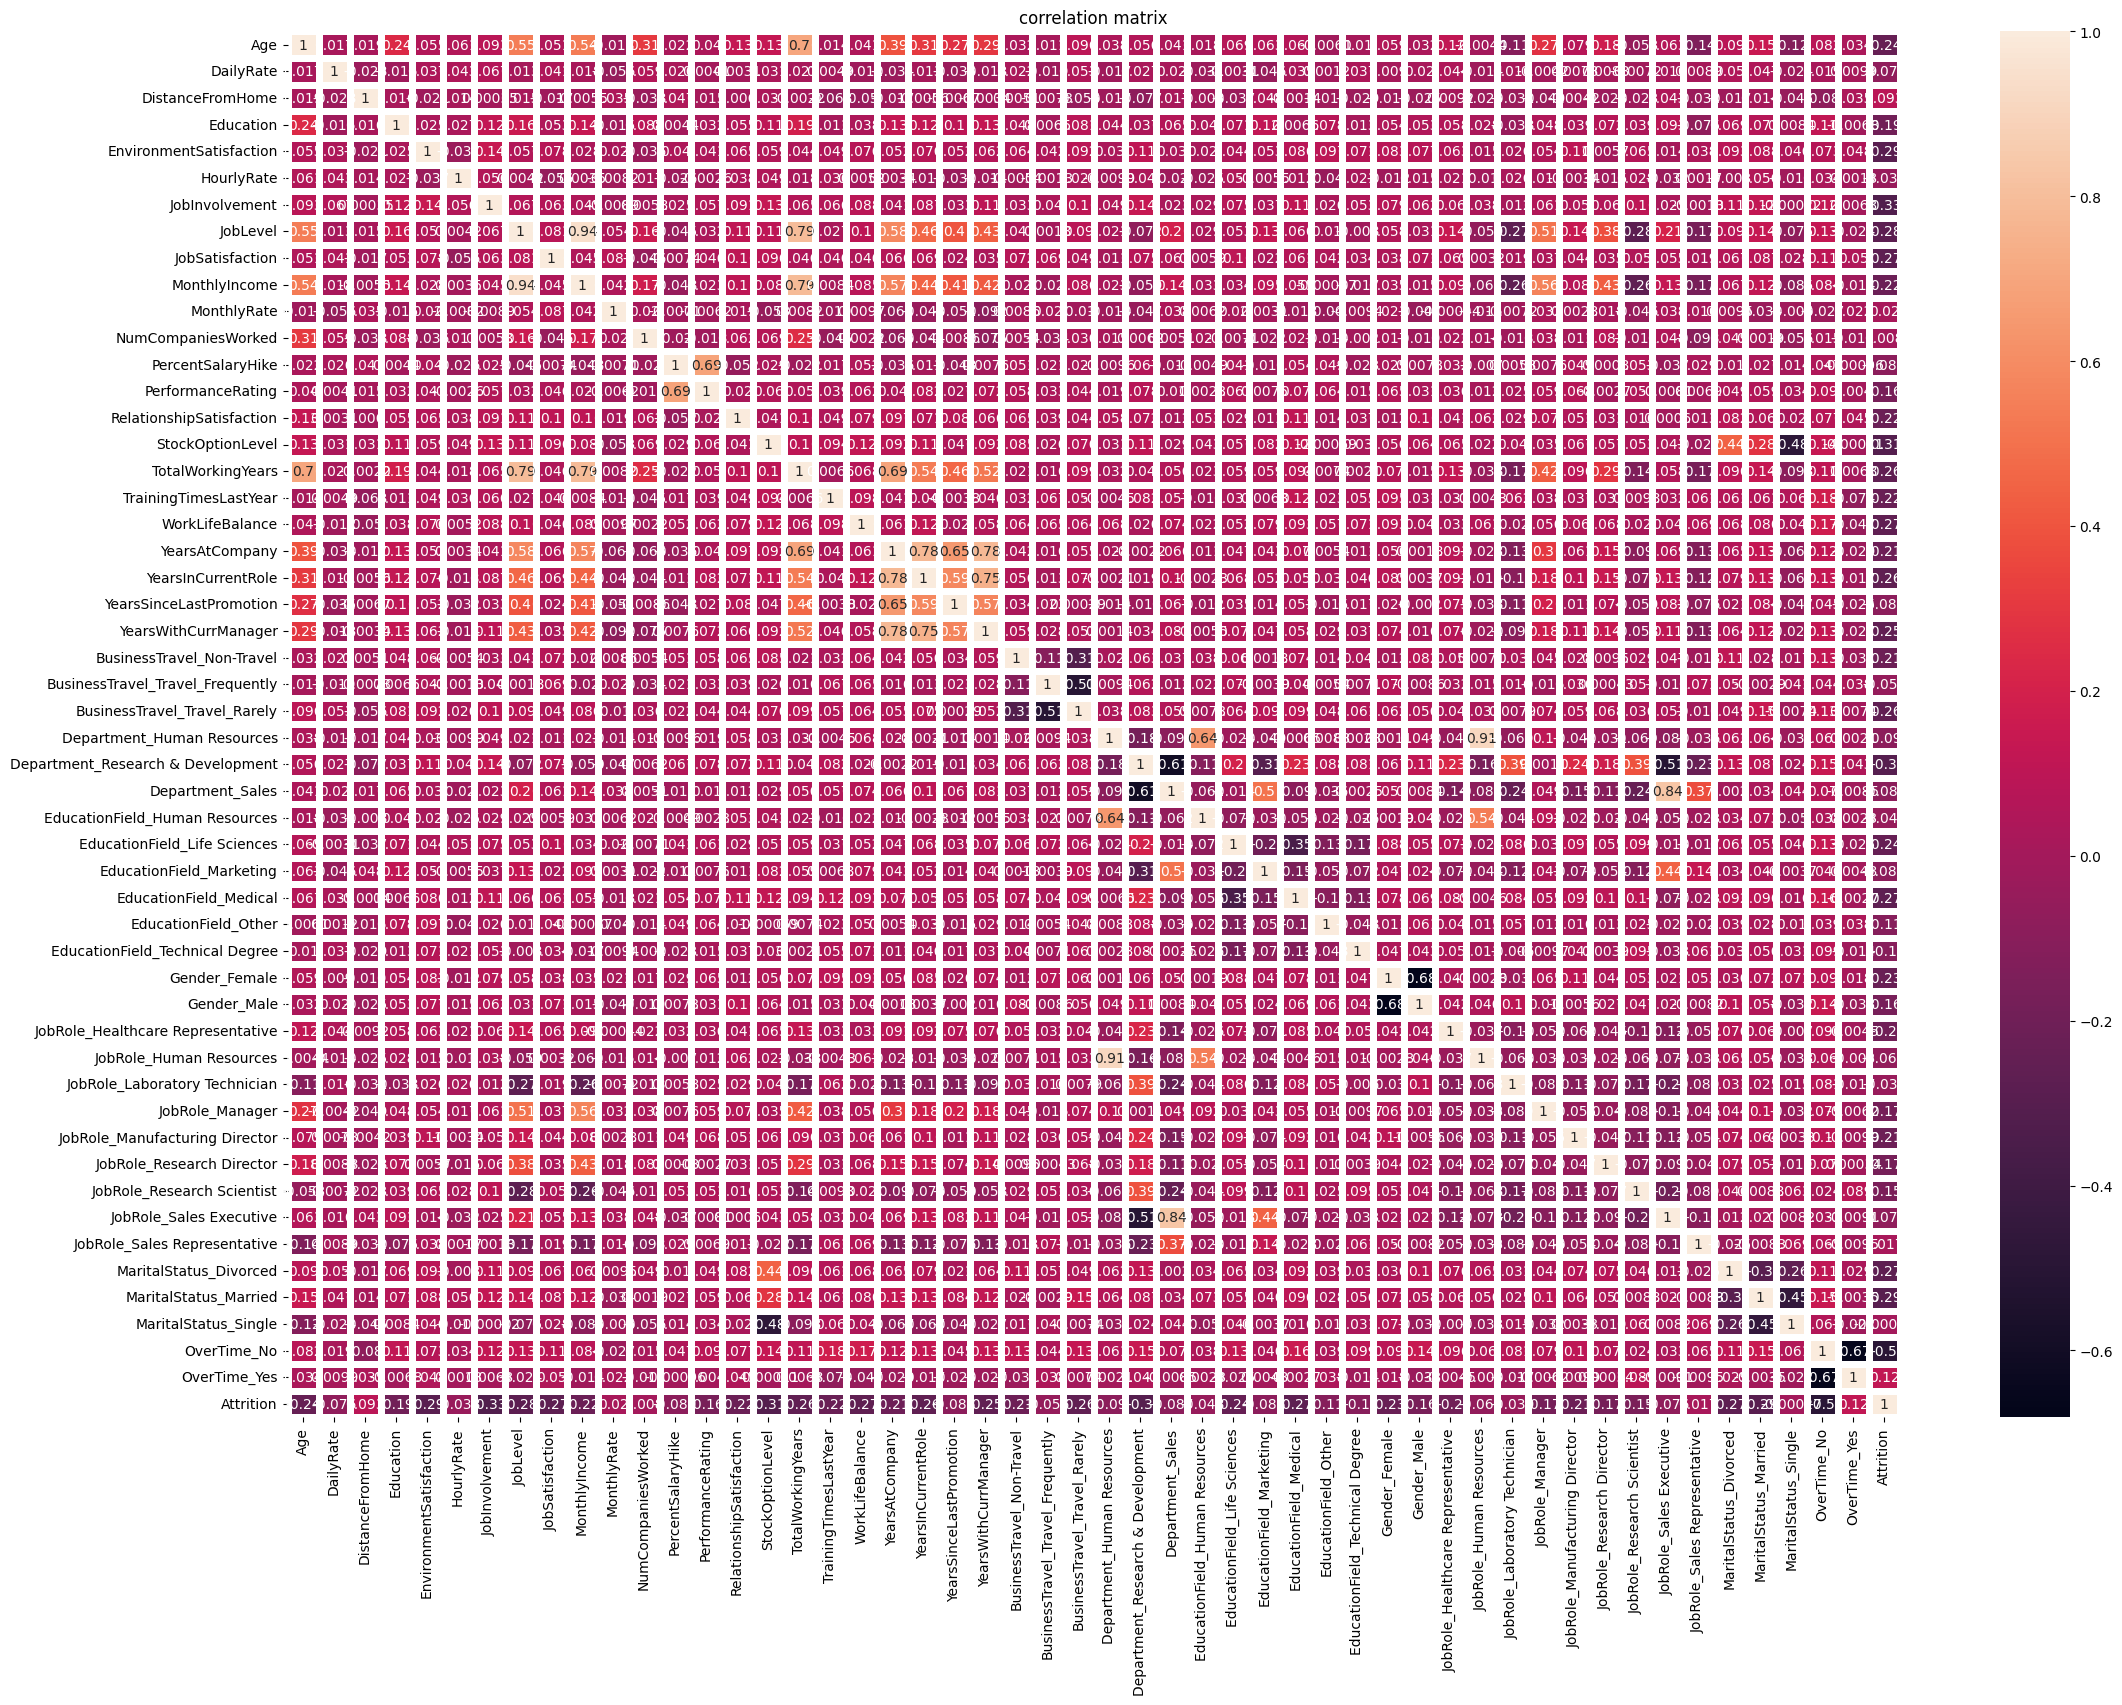

In [11]:
corr_matrix=df.corr()
f,ax=plt.subplots(figsize=(26,18))
sns.heatmap(corr_matrix,linewidths=5.0,ax=ax,annot=True)
ax.set_title('correlation matrix')

In [12]:
print(df.describe(),'\n')

              Age    DailyRate  DistanceFromHome    Education  \
count  2393.00000  2393.000000       2393.000000  2393.000000   
mean     35.51776   784.380694          9.610113     2.743836   
std       8.91725   380.934486          7.665161     0.983979   
min      18.00000   102.000000          1.000000     1.000000   
25%      29.00000   469.000000          3.000000     2.000000   
50%      34.00000   760.000000          8.000000     3.000000   
75%      41.00000  1107.000000         14.000000     3.000000   
max      60.00000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              2393.000000  2393.000000     2393.000000  2393.000000   
mean                  2.467196    65.258253        2.537819     1.866695   
std                   1.074109    18.859678        0.738011     1.038248   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Attrition', axis=1), df['Attrition'], test_size=0.2, random_state=50)

In [14]:
#robust scaling for standardization using quartile
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
#Create an SVM classifier
classifier = svm.SVC()

In [16]:
#Define the hyperparameter grid to search
hyperparameters = {'kernel': ['linear',  'rbf', 'sigmoid'],
                   'C': [0.01, 0.1],
                   'gamma': ['auto','scale']}

In [17]:
#Search the hyperparameter grid using GridSearchCV()
grid_search = GridSearchCV(classifier, hyperparameters, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [18]:
#Use the best model provided by the grid search to make predictions on the test data
best_classifier = grid_search.best_estimator_
print(best_classifier,'\n')
y_pred = best_classifier.predict(X_test_scaled)

SVC(C=0.1, gamma='auto', kernel='linear') 



In [19]:
#Print the confusion matrix and performance metrics (classification report)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[244   1]
 [ 39 195]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       245
           1       0.99      0.83      0.91       234

    accuracy                           0.92       479
   macro avg       0.93      0.91      0.92       479
weighted avg       0.93      0.92      0.92       479



<Axes: >

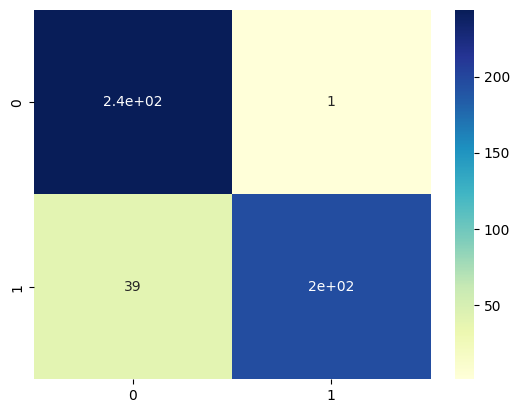

In [20]:
#Display the confusion matrix (heatmap)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")

Age                                 -0.344217
DailyRate                           -0.036354
DistanceFromHome                     0.411920
Education                           -0.175457
EnvironmentSatisfaction             -0.533798
HourlyRate                          -0.010417
JobInvolvement                      -0.752009
JobLevel                            -0.286028
JobSatisfaction                     -0.484649
MonthlyIncome                       -0.021760
MonthlyRate                          0.050745
NumCompaniesWorked                   0.364065
PercentSalaryHike                   -0.033877
PerformanceRating                   -0.112946
RelationshipSatisfaction            -0.282906
StockOptionLevel                    -0.244551
TotalWorkingYears                   -0.439297
TrainingTimesLastYear               -0.338762
WorkLifeBalance                     -0.403573
YearsAtCompany                       0.141811
YearsInCurrentRole                  -0.414604
YearsSinceLastPromotion           

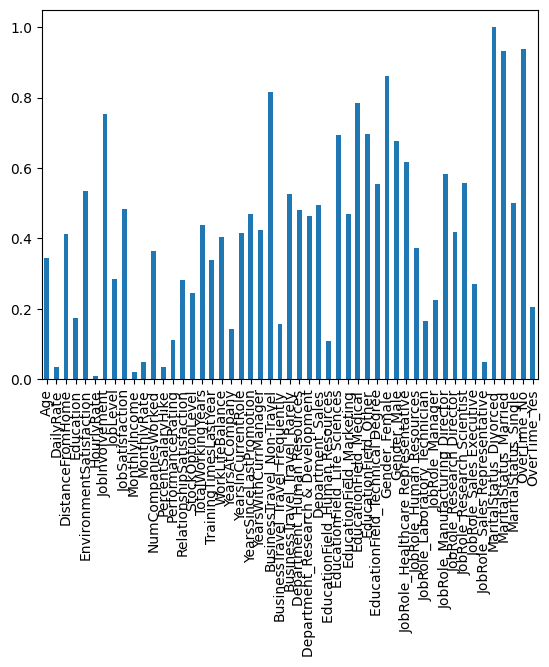

In [21]:
#Display the feature importance plot
import matplotlib.pyplot as plt
importances = pd.Series(best_classifier.coef_[0], index=X_train.columns)
print(importances,'\n')
importances=abs(importances)
print(importances,'\n')
importances.plot(kind='bar')
plt.show()
